## Apuntes

In [2]:
# Importar librerias necesarias
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

1. El número áureo satisface la ecuación $$Φ = 1+\dfrac{1}{Φ}$$ 

de donde se puede obtener de manera relativamente sencilla que 
$$Φ = \dfrac{1+\sqrt{5}}{2}$$

a) Calcule directamente en Python el valor de Φ.

In [3]:
# Se define y se calcula el valor de Φ
phi = (1+np.sqrt(5))/2
phi

1.618033988749895

b) Defina una función adecuada para utilizar el método de la bisección y aproxime el valor de φ, justificando la elección del intervalo elegido, con una tolerancia de $10^{-6}$

In [4]:
# Se define una función cuya raiz sea (1+raiz(5))/2
def f(x): return x-(1+np.sqrt(5))/2
# Función para determinar un valor aproximado al valor de Φ
# a y b intervalos
# f: función f(x)
def biseccion (a, b, f,tolerancia):
    # calcula el xi hasta que sobrepase la tolerancia permitida
    while (np.abs(a-b)>=tolerancia):
        xi = (a+b)/2
        producto = f(a)*f(xi)
        if producto < 0:
            b = xi #cambio de signo en el lado derecho
        else:
            if producto > 0:
                a = xi #cambio de signo en el aldo izquierdo
            else:
                if producto == 0:
                    a = xi
                    b = xi
    return xi
# Calcula el valor aproximado de φ
# Se utiliza el intervalo [0,1.9] dado que la función es continua y f(a)f(b)<0, por lo que se puede asegurar la existencia 
# de una solución en dicho intervalo
solucion = biseccion(0, 1.9, f, 10e-6)
solucion

1.6180339813232423

e) Suponga que el valor máquina encontrado en (a) es el valor real de φ. Calcule el error cometido con cada uno de los métodos y concluya cuál de ellos entrega una mejor aproximación.


In [5]:
# Determina el error absoluto del método de la bisección
Errorbiseccion = np.abs(phi-solucion)
print("El error absoluto mediante el método de la bisección es:", Errorbiseccion)

El error absoluto mediante el método de la bisección es: 7.426652626207897e-09


----------------------------------------------------------


a) Considere la función por partes definida por

$$ \theta(t) = \left\lbrace
\begin{matrix}
3 & si & t<1 \\
t-1 & si & 1<= t < 2 \\
t & si & t>= 2
\end{matrix}
\right.
$$

reescriba la función en términos de la función de Heaviside, utilizando la notación de Jupyter para esta función

In [6]:
# Se declaran las variables simbólicas
t,s = sp.symbols("t,s")

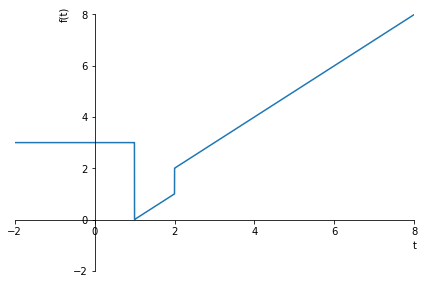

In [13]:
# Se reescribe la función en términos de Heaviside
f = 3 - 3*sp.Heaviside(t-1) + sp.Heaviside(t-1)*(t-1) - sp.Heaviside(t-2)*(t-1) + sp.Heaviside(t-2)*t 
f = 3 - (3-(t-1))*sp.Heaviside(t-1)+(t-(t-1))*sp.Heaviside(t-2)
# Grafica la función
sp.plot(f, xlim=(-2,8), ylim=(-2,8))

b) Utilizando Transformada de Laplace y con ayuda de los comandos de Python, resuelva la ecuación

$$ y''' + 2y'' = 1 + f(t) $$

con condiciones $ y(0) = y'(0) = 0, y''(0) = 1 $, donde $f(t)$ es la función por partes definida en el apartado anterior.

In [14]:
transformada = sp.laplace_transform(f,t,s,noconds=True)
transformada

3/s - 3*exp(-s)/s + exp(-2*s)/s + exp(-s)/s**2

In [37]:
# Se calcula la transformada del lado derecho de la ecuación luego de utilizar la transformada de la derivada, tal que
# L[Y](s**3 + 2*s**2) = 1 + L[1] + L[f(t)]
transformada_2= 1 + (1/s) + transformada
transformada_2

1 + 4/s - 3*exp(-s)/s + exp(-2*s)/s + exp(-s)/s**2

In [39]:
# Se despeja L[Y]
Y = (transformada_2)/(s**3+2*s**2)
Y

(1 + 4/s - 3*exp(-s)/s + exp(-2*s)/s + exp(-s)/s**2)/(s**3 + 2*s**2)

In [40]:
# Calcula la transformada inversa de Y(s) para obtener la función y(t)
y = sp.inverse_laplace_transform(Y,s,t, noconds=True)
print("y(s) =")
y

y(s) =


(12*((4*t**2 - 2*t + 1)*exp(2*t) - 1)*Heaviside(t) + (6*(2*t**2 - 10*t - exp(4 - 2*t) + 13)*Heaviside(t - 2) + (4*t**3 - 54*t**2 + 138*t + 21*exp(2 - 2*t) - 109)*Heaviside(t - 1))*exp(2*t))*exp(-2*t)/48

c) Grafique la solución de la ecuación diferencial y estudie el comportamiento de la solución $y(t)$ conforme $t → ∞$.


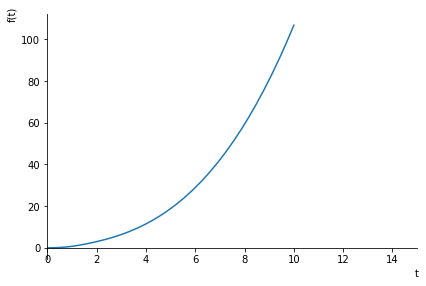

In [16]:
# Grafica la solución y(t) de ecuación de la ecuación diferencial
sp.plot(y, xlim=(0,15))

In [17]:
# Se observa que conforme t tiende al infinito, la solución y(t) tiene un comportamiento exponencial